In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import seaborn as sns
# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
app_train.select_dtypes(['float']).columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI'

In [6]:
app_train[app_train.columns[0:20]].select_dtypes(['float']).head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0


In [7]:
app_train[app_train.columns[20:50]].select_dtypes(['float']).head()

,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG
0,NaN,1.0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00
1,NaN,2.0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08
2,26.0,1.0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2.0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.0,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
app_train[app_train.columns[50:70]].select_dtypes(['float']).head()

,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE
0,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198
1,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


將columns 取出，建立新的df，有下列三種方法，[參考Pandas user guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

In [9]:
#方法一
cap_data = []
cap_data.append(app_train['TARGET'])
cap_data.append(app_train['AMT_INCOME_TOTAL'])
cap_data.append(app_train['AMT_CREDIT'])
cap_data.append(app_train['AMT_ANNUITY'])
cap_data.append(app_train['AMT_GOODS_PRICE'])
cap_data.append(app_train['REGION_POPULATION_RELATIVE'])
cap_data.append(app_train['DAYS_REGISTRATION'])
new_app_train=pd.DataFrame(cap_data).T

In [10]:
#方法二
new_app_train_ = pd.concat([app_train['TARGET'],
                            app_train['AMT_INCOME_TOTAL'],
                            app_train['AMT_CREDIT'],
                            app_train['AMT_ANNUITY'],
                            app_train['AMT_GOODS_PRICE'],
                            app_train['REGION_POPULATION_RELATIVE'],
                            app_train['DAYS_REGISTRATION']],axis=1)

In [11]:
#方法三
new_app_train__ = pd.DataFrame(app_train['TARGET']).join(app_train['AMT_INCOME_TOTAL'])
new_app_train__ = new_app_train__.join(app_train['AMT_CREDIT'])
new_app_train__ = new_app_train__.join(app_train['AMT_ANNUITY'])
new_app_train__ = new_app_train__.join(app_train['AMT_GOODS_PRICE'])
new_app_train__ = new_app_train__.join(app_train['REGION_POPULATION_RELATIVE'])
new_app_train__ = new_app_train__.join(app_train['DAYS_REGISTRATION'])

In [12]:
new_app_train__['AMT_INCOME_TOTAL'].head()

0    202500.0
1    270000.0
2     67500.0
3    135000.0
4    121500.0
Name: AMT_INCOME_TOTAL, dtype: float64

- 計算任意欄位的平均數及標準差

In [13]:
for column in new_app_train__.columns:
    print("mean of "+str(column)+" : ",new_app_train[column].mean())

for column in new_app_train__.columns:
    print("standard deviation of  "+str(column)+" : ",new_app_train[column].std())

mean of TARGET :  0.08072881945686496
mean of AMT_INCOME_TOTAL :  168797.9192969845
mean of AMT_CREDIT :  599025.9997057016
mean of AMT_ANNUITY :  27108.573909183444
mean of AMT_GOODS_PRICE :  538396.2074288895
mean of REGION_POPULATION_RELATIVE :  0.020868112057780042
mean of DAYS_REGISTRATION :  -4986.120327538419
standard deviation of  TARGET :  0.27241864564839396
standard deviation of  AMT_INCOME_TOTAL :  237123.14627885626
standard deviation of  AMT_CREDIT :  402490.77699585486
standard deviation of  AMT_ANNUITY :  14493.737315118333
standard deviation of  AMT_GOODS_PRICE :  369446.46054005757
standard deviation of  REGION_POPULATION_RELATIVE :  0.0138312801227047
standard deviation of  DAYS_REGISTRATION :  3522.8863209630713


- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

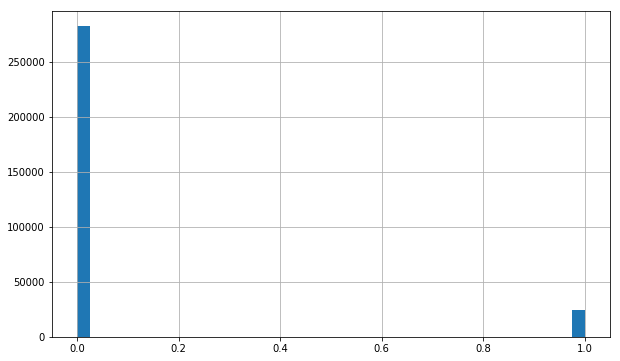

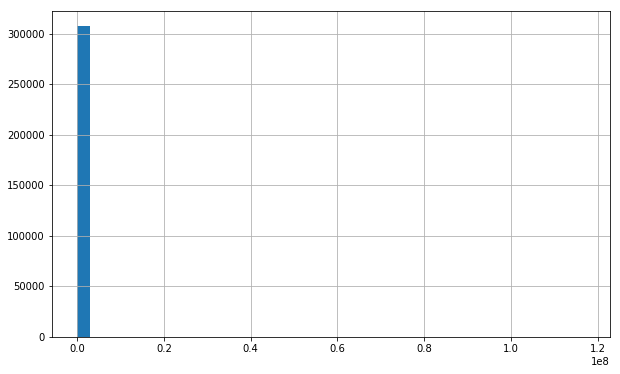

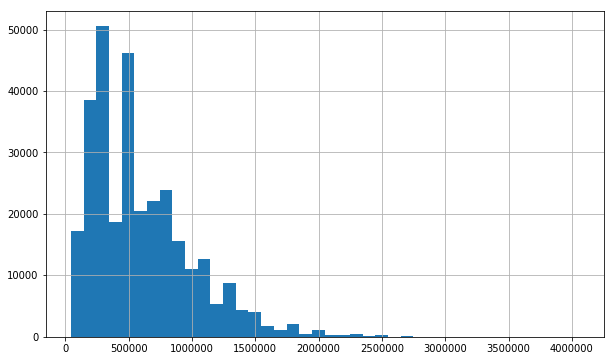

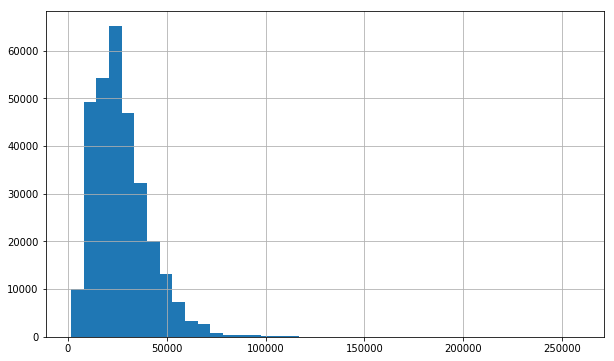

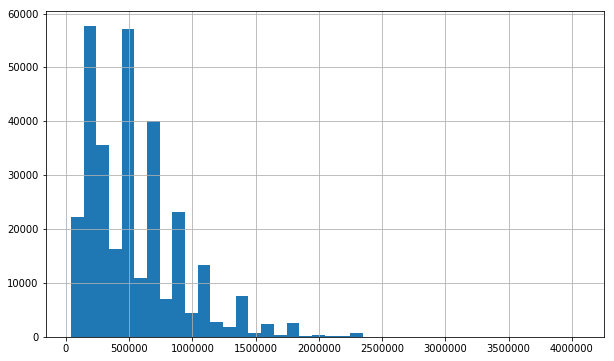

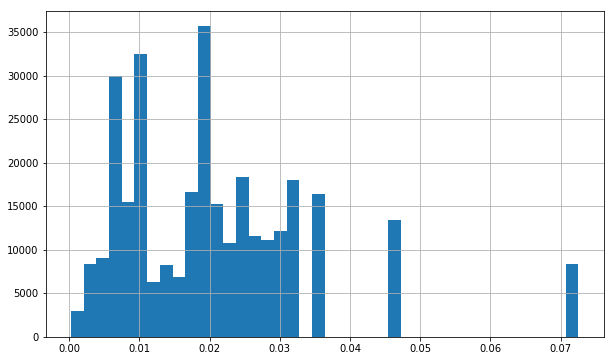

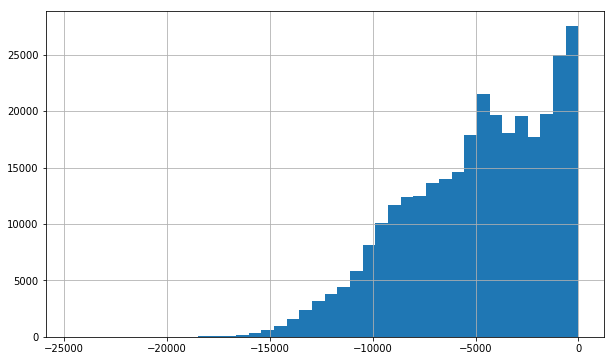

In [14]:
for column in new_app_train__.columns:
    plt.figure(figsize=(10,6))
    new_app_train__[column].hist(bins=40,)
    plt.show()
